# Modelo de predicción

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

1. Leer los datos procesados

In [2]:
df = pd.read_csv('../data/consumption_features.csv')
df.head()

,Passenger_Count,Unit_Cost,haul,Origin_DOH,Origin_JFK,Origin_LHR,Origin_MEX,Origin_NRT,Origin_ZRH,Product_BRD001,...,Product_SNK001,Percentage_Returned,day,flights,passengers,max capacity,Avg_Pass_Per_Flight_Day,Load_vs_Daily_Avg,Month,DayOfWeek
0,272,0.35,2,True,False,False,False,False,False,True,...,False,0.327684,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,272,0.80,2,True,False,False,False,False,False,False,...,False,0.326531,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,272,0.75,2,True,False,False,False,False,False,False,...,False,0.274809,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,272,0.45,2,True,False,False,False,False,False,False,...,False,0.180488,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,272,0.50,2,True,False,False,False,False,False,False,...,False,0.482234,0.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0


## Preparación del dataset

1. Preparación de los datos

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 2. Definición de X e Y ---
TARGET_COLUMN = 'Percentage_Returned'

# Y es nuestra columna objetivo
Y = df[TARGET_COLUMN]

# X son todas las demás columnas
X = df.drop(TARGET_COLUMN, axis=1)


# Llenamos cualquier posible NaN restante en X (si lo hubiera) con 0
X = X.fillna(0)

# --- 4. División de Datos (90% train, 10% test) ---
# Usamos test_size=0.10 para obtener un 10% de datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_train: {Y_train.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

# --- 5. Escalamiento de Datos ---
# Es crucial para las redes neuronales que los datos estén en una escala similar
scaler = StandardScaler()

# Ajustamos el scaler SÓLO con los datos de entrenamiento (para evitar data leakage)
X_train_scaled = scaler.fit_transform(X_train)

# Transformamos los datos de prueba con el scaler ya ajustado
X_test_scaled = scaler.transform(X_test)

Forma de X_train: (420, 27)
Forma de X_test: (47, 27)
Forma de Y_train: (420,)
Forma de Y_test: (47,)


## Modelos y Parámetros

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Definimos el modelo de Random Forest
# n_estimators = el número de "árboles" en el bosque. 100 es un buen punto de partida.
# random_state=42 asegura que obtengas los mismos resultados cada vez que lo corras.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

## Entrenamiento del modelo

In [5]:
print("Iniciando entrenamiento del Random Forest...")

# 2. Entrenamos el modelo
# ¡Nota que usamos X_train y no X_train_scaled!
rf_model.fit(X_train, Y_train)

print("Entrenamiento finalizado.")

Iniciando entrenamiento del Random Forest...
Entrenamiento finalizado.



--- 1. Iniciando la predicción en el conjunto de prueba... ---

--- 2. Métricas de Evaluación (Random Forest) ---
Error Absoluto Medio (MAE) en Test: 0.0924
R-cuadrado (R²) en Test: -0.3205

(El MAE significa que, en promedio, las predicciones se equivocan por ~9.24 puntos porcentuales.)

Comparación R²:
  Random Forest: -0.3205
  Red Neuronal:  -0.9235 (Valor anterior)

El R² sigue siendo negativo o cero. El modelo aún no logra generalizar.

--- 3. Comparación Directa (Predicción vs. Real) ---
    Actual_Returned  Predicted_Returned  Difference (Error)
0          0.178744            0.289914           -0.111170
1          0.148810            0.342711           -0.193902
2          0.211921            0.265168           -0.053247
3          0.392000            0.310453            0.081547
4          0.387597            0.239663            0.147934
5          0.151515            0.328937           -0.177422
6          0.203540            0.327615           -0.124075
7          0.194631

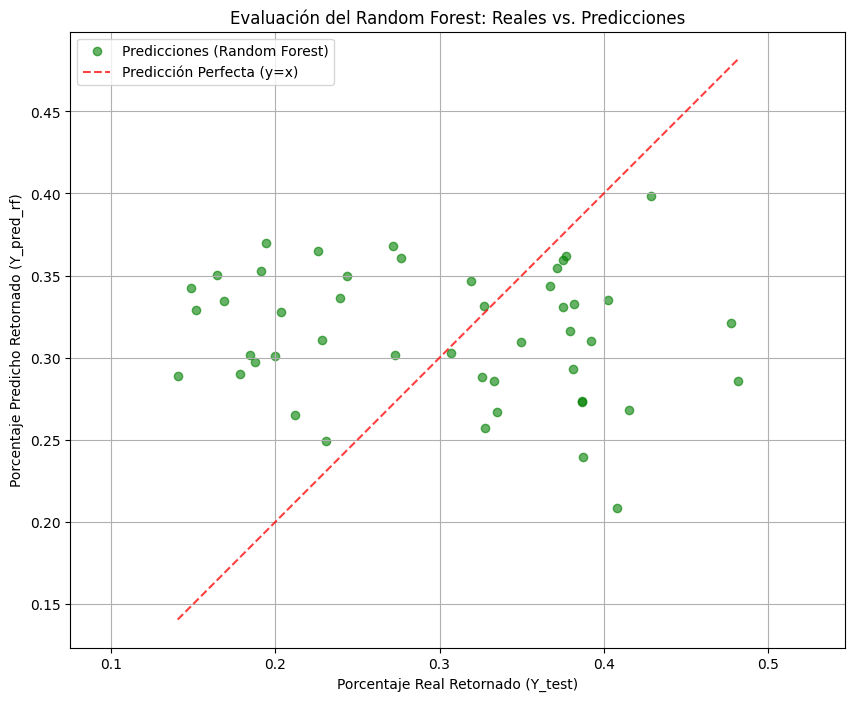

In [6]:
print("\n--- 1. Iniciando la predicción en el conjunto de prueba... ---")

# 1. Obtenemos las predicciones del modelo
# ¡Nota que usamos X_test y no X_test_scaled!
Y_pred_rf = rf_model.predict(X_test)

print("\n--- 2. Métricas de Evaluación (Random Forest) ---")

# 2. Calculamos las métricas
rf_mae = mean_absolute_error(Y_test, Y_pred_rf)
rf_r2 = r2_score(Y_test, Y_pred_rf)

print(f"Error Absoluto Medio (MAE) en Test: {rf_mae:.4f}")
print(f"R-cuadrado (R²) en Test: {rf_r2:.4f}")

print(f"\n(El MAE significa que, en promedio, las predicciones se equivocan por ~{rf_mae*100:.2f} puntos porcentuales.)")

# Comparamos con el R² de tu Red Neuronal
print(f"\nComparación R²:")
print(f"  Random Forest: {rf_r2:.4f}")
print(f"  Red Neuronal:  -0.9235 (Valor anterior)")

if rf_r2 > 0:
    print("\n¡Excelente! Un R² positivo significa que el modelo es mucho mejor que antes.")
else:
    print("\nEl R² sigue siendo negativo o cero. El modelo aún no logra generalizar.")
    
    
# --- 3. Comparación Directa (DataFrame) ---
print("\n--- 3. Comparación Directa (Predicción vs. Real) ---")
df_comparison_rf = pd.DataFrame({
    'Actual_Returned': Y_test.reset_index(drop=True),
    'Predicted_Returned': Y_pred_rf
})
df_comparison_rf['Difference (Error)'] = df_comparison_rf['Actual_Returned'] - df_comparison_rf['Predicted_Returned']
print(df_comparison_rf.head(20))


# --- 4. Evaluación Visual (Scatter Plot) ---
print("\n--- 4. Generando Gráfico de Evaluación (Random Forest)... ---")

plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred_rf, alpha=0.6, label='Predicciones (Random Forest)', color='green')

# Línea de 45 grados (Predicción Perfecta)
lims = [
    min(Y_test.min(), Y_pred_rf.min()),
    max(Y_test.max(), Y_pred_rf.max())
]
plt.plot(lims, lims, 'r--', alpha=0.75, label='Predicción Perfecta (y=x)')

plt.xlabel('Porcentaje Real Retornado (Y_test)')
plt.ylabel('Porcentaje Predicho Retornado (Y_pred_rf)')
plt.title('Evaluación del Random Forest: Reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Recommendations for Improving the Model

This section includes changes to improve the model's performance and reduce error.

In [8]:
# --- Improved Data Handling ---
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Replace filling NaN with 0 by using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Update parameter grid to replace 'auto' with 'sqrt'
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

# Reinitialize GridSearchCV with error_score='raise' to debug invalid combinations
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    error_score='raise'  # Raise errors for invalid parameter combinations
)

# Fit GridSearchCV
print("Starting hyperparameter tuning with updated parameter grid...")
rf_grid_search.fit(X_train, Y_train)
print("Best parameters found:", rf_grid_search.best_params_)

Starting hyperparameter tuning with updated parameter grid...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_spli

In [ ]:
# Use the best model
best_rf_model = rf_grid_search.best_estimator_

# Additional Metrics
from sklearn.metrics import mean_squared_error

# Predict using the best model
Y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate additional metrics
# Some sklearn versions don't accept the `squared` kwarg, so compute RMSE manually
rf_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_best_rf))
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")

# Feature Importance
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

print("\nFeature Importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Root Mean Squared Error (RMSE): 0.0990

Feature Importances:
Passenger_Count: 0.2406
Unit_Cost: 0.1246
DayOfWeek: 0.1016
Month: 0.0587
Origin_JFK: 0.0401
Product_DRK023: 0.0393
haul: 0.0371
Product_DRK024: 0.0365
Origin_NRT: 0.0347
Product_COF200: 0.0285
Origin_MEX: 0.0285
Origin_DOH: 0.0280
Product_BRD001: 0.0272
Product_NUT030: 0.0259
Product_JCE200: 0.0233
Product_CRK075: 0.0226
Origin_LHR: 0.0225
Product_SNK001: 0.0215
Origin_ZRH: 0.0210
Product_HTB110: 0.0196
Product_CHO050: 0.0184
day: 0.0000
flights: 0.0000
max capacity: 0.0000
passengers: 0.0000
Load_vs_Daily_Avg: 0.0000
Avg_Pass_Per_Flight_Day: 0.0000


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, Y_pred_best_rf)
print(f"Mean Squared Error (MSE): {mse:.4f}")

mae = mean_absolute_error(Y_test, Y_pred_best_rf)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

r2 = r2_score(Y_test, Y_pred_best_rf)
print(f"R² (Coefficient of Determination): {r2:.4f}")

#antes
#Error Absoluto Medio (MAE) en Test: 0.0924
#R-cuadrado (R²) en Test: -0.3205

Mean Squared Error (MSE): 0.0098
Mean Absolute Error (MAE): 0.0868
R² (Coefficient of Determination): -0.0921
